# Missing values

In [1]:
import seaborn as sns

In [29]:
df=sns.load_dataset('titanic')

In [30]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [31]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [32]:
# Delet the row  data point and handal the missing data
df.shape


(891, 15)

In [33]:
df.dropna().shape

(182, 15)

In [34]:
df.shape

(891, 15)

# Mean imputation technique -- For nummerical data


### mean

In [35]:
df['age_mean']=df['age'].fillna(df['age'].mean())

In [36]:
df[['age','age_mean']]

,age,age_mean
0,22.0,22.000000
1,38.0,38.000000
2,26.0,26.000000
3,35.0,35.000000
4,35.0,35.000000
...,...,...
886,27.0,27.000000
887,19.0,19.000000
888,NaN,29.699118
889,26.0,26.000000


# 2- Median

In [37]:
df['age_median']=df['age'].fillna(df['age'].median())

In [38]:
df[['age','age_mean','age_median']]

,age,age_mean,age_median
0,22.0,22.000000,22.0
1,38.0,38.000000,38.0
2,26.0,26.000000,26.0
3,35.0,35.000000,35.0
4,35.0,35.000000,35.0
...,...,...,...
886,27.0,27.000000,27.0
887,19.0,19.000000,19.0
888,NaN,29.699118,28.0
889,26.0,26.000000,26.0


# 3 Mode  imputation Technque for categorical data

In [39]:
df['embarked']=df['embarked'].fillna(df['embarked'].mode())

In [40]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
age_mean         0
age_median       0
dtype: int64

# Handling the imbalance dataset

An imbalanced dataset occurs when the distribution of target labels is not uniform, often resulting in one class significantly outnumbering others. This can bias machine learning models toward the majority class, leading to poor performance on the minority class

1. Resampling Techniques
Oversampling: Increase the number of samples in the minority class.

2. Undersampling: Reduce the number of samples in the majority class

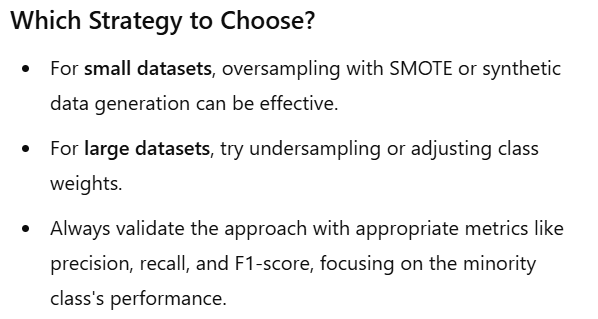

In [41]:
import numpy as np
import pandas as pd
# se the Random seed for reproducibility
np.random.seed(123)
# Creatingthe data frame 
n_sample=10000
class_0_ratio=.9
n_class_0=int(n_sample*class_0_ratio)
n_class_1=n_sample-n_class_0


In [42]:
n_class_0,n_class_1

(9000, 1000)

In [43]:
import numpy as np
import pandas as pd

# Set the random seed for reproducibility
np.random.seed(123)

# Parameters for the dataset
n_sample = 10000
class_0_ratio = 0.9
n_class_0 = int(n_sample * class_0_ratio)
n_class_1 = n_sample - n_class_0

# Create feature data for class 0 and class 1
X_class_0 = np.random.normal(loc=0, scale=1, size=(n_class_0, 2))  # Features for class 0
X_class_1 = np.random.normal(loc=3, scale=1, size=(n_class_1, 2))  # Features for class 1

# Combine the feature data and create labels
X = np.vstack((X_class_0, X_class_1))
y = np.hstack((np.zeros(n_class_0), np.ones(n_class_1)))

# Create a DataFrame
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])
df['Target'] = y

# Shuffle the dataset
df = df.sample(frac=1).reset_index(drop=True)

# Display the first few rows
print(df.head())

# Check the class distribution
print("Class Distribution:")
print(df['Target'].value_counts())


   Feature_1  Feature_2  Target
0   0.374175   0.984507     0.0
1  -0.239669   0.143308     0.0
2   1.554460  -0.186296     0.0
3   0.471935  -1.348551     0.0
4   2.567236   0.868606     0.0
Class Distribution:
Target
0.0    9000
1.0    1000
Name: count, dtype: int64


In [45]:
## upsampling
df_majority=df[df['Target']==0]
df_minority=df[df['Target']==1]

In [ ]:
from sklearn.utils import resample

# Perform upsampling of the minority class
df_minority_upsampled = resample(
    df_minority,            # DataFrame containing the minority class
    replace=True,           # Sample with replacement
    n_samples=len(df_majority),  # Match the size of the majority class
    random_state=42         # Set seed for reproducibility
)

# Explanation:
# - `replace=True`: Allows sampling with replacement since the minority class might have fewer samples.
# - `n_samples=len(df_majority)`: Ensures the minority class is upsampled to the same number of samples as the majority class.
# - `random_state=42`: Ensures reproducibility of results.



In [47]:
df_minority_upsampled.shape

(9000, 3)

2. Downsampling

In [48]:
import numpy as np
import pandas as pd

# Set the random seed for reproducibility
np.random.seed(123)

# Parameters for the dataset
n_sample = 10000
class_0_ratio = 0.9
n_class_0 = int(n_sample * class_0_ratio)
n_class_1 = n_sample - n_class_0

# Create feature data for class 0 and class 1
X_class_0 = np.random.normal(loc=0, scale=1, size=(n_class_0, 2))  # Features for class 0
X_class_1 = np.random.normal(loc=3, scale=1, size=(n_class_1, 2))  # Features for class 1

# Combine the feature data and create labels
X = np.vstack((X_class_0, X_class_1))
y = np.hstack((np.zeros(n_class_0), np.ones(n_class_1)))

# Create a DataFrame
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])
df['Target'] = y

# Shuffle the dataset
df = df.sample(frac=1).reset_index(drop=True)

# Display the first few rows
print(df.head())

# Check the class distribution
print("Class Distribution:")
print(df['Target'].value_counts())


   Feature_1  Feature_2  Target
0   0.374175   0.984507     0.0
1  -0.239669   0.143308     0.0
2   1.554460  -0.186296     0.0
3   0.471935  -1.348551     0.0
4   2.567236   0.868606     0.0
Class Distribution:
Target
0.0    9000
1.0    1000
Name: count, dtype: int64


In [49]:
## Downsampling
df_majority=df[df['Target']==0]
df_minority=df[df['Target']==1]

In [50]:
from sklearn.utils import resample

# Perform downsampling of the majority class
df_majority_downsampled = resample(
    df_majority,            # DataFrame containing the majority class
    replace=False,          # Sample without replacement
    n_samples=len(df_minority),  # Match the size of the minority class
    random_state=42         # Set seed for reproducibility
)

# Explanation:
# - `replace=False`: Sampling without replacement ensures no duplicate samples.
# - `n_samples=len(df_minority)`: Reduces the majority class to match the size of the minority class.
# - `random_state=42`: Ensures reproducibility of results.


In [51]:
df_majority_downsampled.shape

(1000, 3)

In [52]:
df_majority_downsampled.head()

,Feature_1,Feature_2,Target
8835,0.749316,-0.909373,0.0
1296,-0.233187,-0.972855,0.0
644,1.404462,0.005498,0.0
4556,1.247187,0.300101,0.0
9349,-1.342772,0.294376,0.0


# SMOTE (Synthetic Minority Oversampling Technique) 
SMOTE (Synthetic Minority Oversampling Technique)is a popular method for handling imbalanced datasets. It generates synthetic samples for the minority class instead of simply duplicating existing ones. SMOTE works by creating new samples along the line segments joining a minority class instance and its nearest neighbors.

In [53]:
from sklearn.datasets import make_classification

In [54]:
X,y=make_classification(n_samples=1000,n_features=2,n_clusters_per_class=1,weights=[0.90],n_redundant=0,random_state=12)

In [55]:
import pandas as pd
df1=pd.DataFrame(X,columns=['r1','r2'])
df2=pd.DataFrame(y,columns=['target'])

In [58]:
main_df=pd.concat([df1,df2],axis=1)

In [59]:
main_df.head()

,r1,r2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [61]:
main_df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

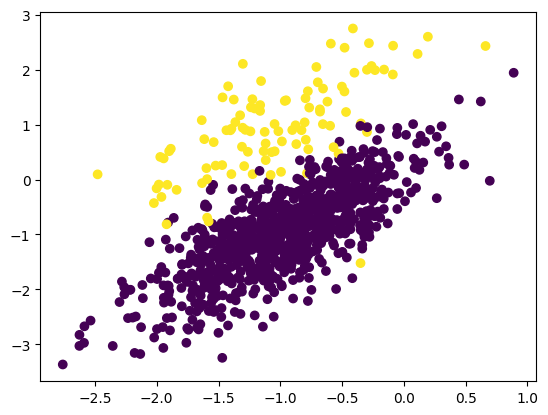

In [63]:
import matplotlib.pyplot as plt
plt.scatter(main_df['r1'],main_df['r2'],c=main_df['target'])

In [64]:
! pip install imbalanced-learn



[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


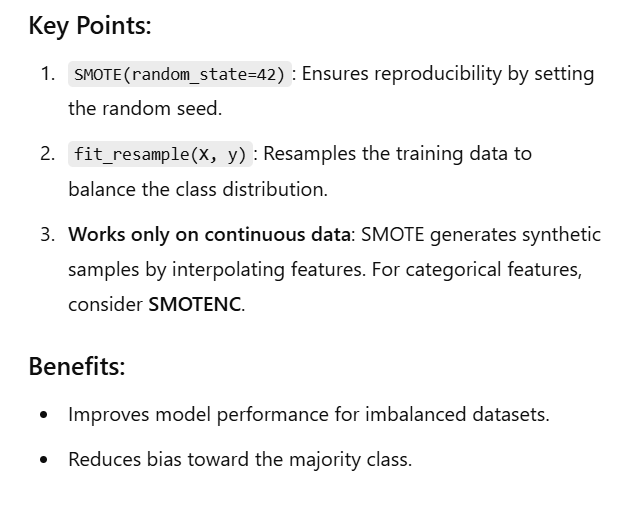

In [65]:
from imblearn.over_sampling import SMOTE

In [73]:
## transform the dataset
oversample=SMOTE()
X,y=oversample.fit_resample(main_df[['r1','r2']],main_df['target'])

In [74]:
X.shape

(1800, 2)

In [75]:
y.value_counts()

target
0    900
1    900
Name: count, dtype: int64

In [76]:
import pandas as pd
df1=pd.DataFrame(X,columns=['r1','r2'])
df2=pd.DataFrame(y,columns=['target'])
oversample_df=pd.concat([df1,df2],axis=1)

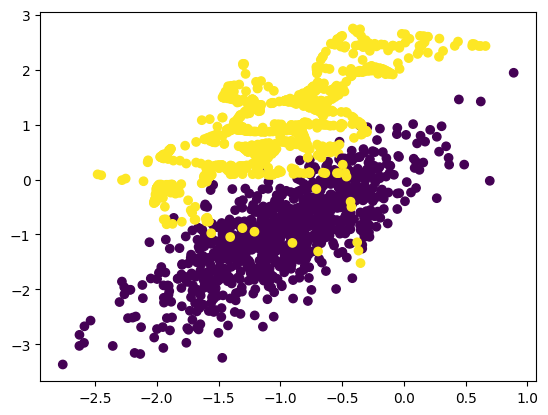

In [79]:
import matplotlib.pyplot as plt
plt.scatter(oversample_df['r1'],oversample_df['r2'],c=oversample_df['target'])

## 5 Point Summery And Box PLot

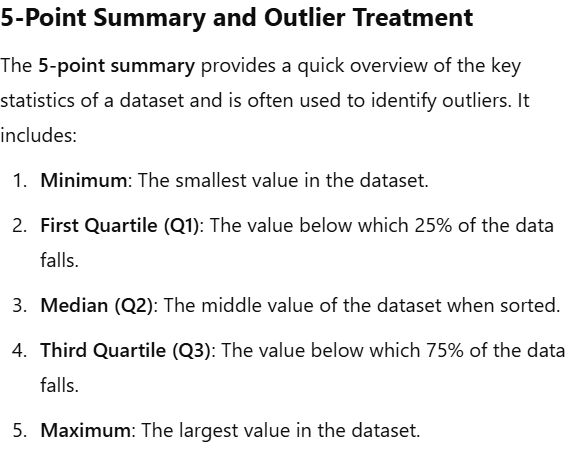

In [80]:
## minimum,maximum,Q1,Q2,Q3,IQR


In [81]:
import numpy as np

In [94]:
list_marks=[39,65,76,87,56,68,86,97,67,44,43,93,84,98]

In [95]:
minimum,Q1,Q2,Q3,maximum=np.quantile(list_marks,[0,0.25,0.50,0.75,1])

In [96]:
minimum,Q1,Q2,Q3,maximum

(39.0, 58.25, 72.0, 86.75, 98.0)

In [97]:
IQR=Q3-Q1
print(IQR)

28.5


In [98]:
lower_fence=Q1-1.5*IQR
higher_fence=Q1+1.5*IQR

In [99]:
lower_fence,higher_fence

(15.5, 101.0)

In [100]:
import seaborn as sns

<Axes: >

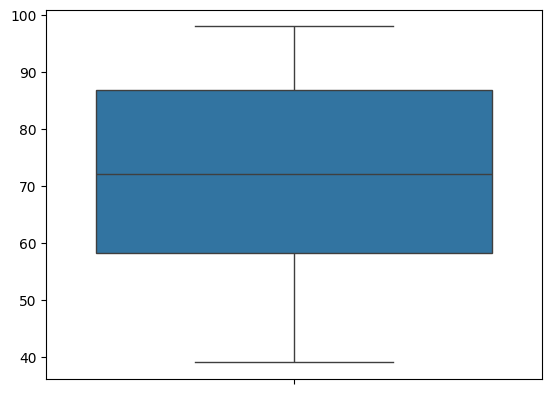

In [102]:
sns.boxplot(list_marks)

In [107]:
list_marks=[39,65,76,87,56,68,86,97,67,44,43,93,84,98,187,165,-123,1]

<Axes: >

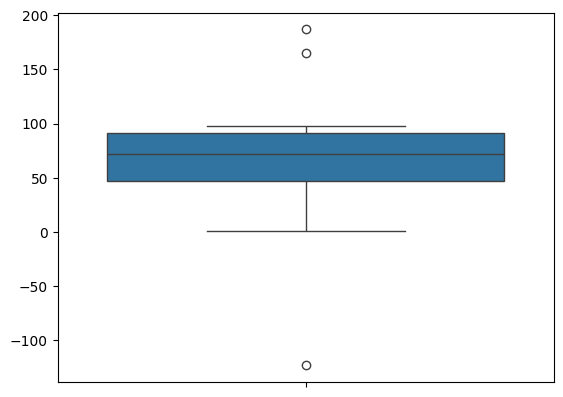

In [108]:
sns.boxplot(list_marks)

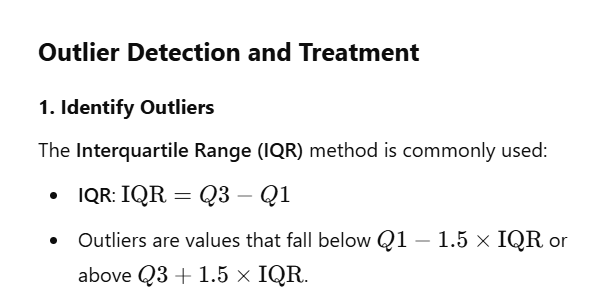

In [114]:
import pandas as pd

# Example data
data = {'Values': [12, 15, 14, 10, 25, 30, 40, 35, 50, 5]}
df = pd.DataFrame(data)

# 5-point summary
summary = df['Values'].describe()
print(summary)

# Extract key statistics
minimum = summary['min']
q1 = summary['25%']
median = summary['50%']
q3 = summary['75%']
maximum = summary['max']

print("\n5-Point Summary:")
print(f"Minimum: {minimum}")
print(f"Q1: {q1}")
print(f"Median: {median}")
print(f"Q3: {q3}")
print(f"Maximum: {maximum}")


count    10.000000
mean     23.600000
std      14.796396
min       5.000000
25%      12.500000
50%      20.000000
75%      33.750000
max      50.000000
Name: Values, dtype: float64

5-Point Summary:
Minimum: 5.0
Q1: 12.5
Median: 20.0
Q3: 33.75
Maximum: 50.0


<Axes: ylabel='Values'>

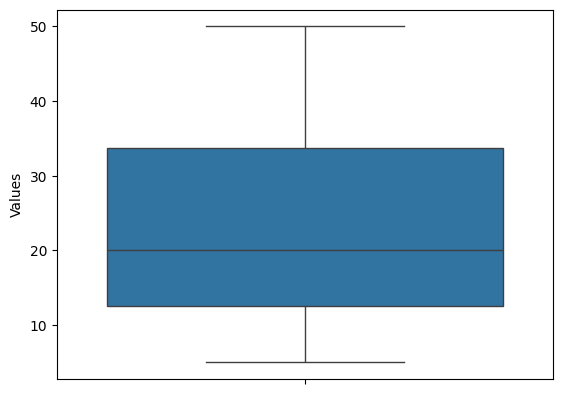

In [115]:
sns.boxplot(df['Values'])

In [111]:
# Calculate IQR
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

# Identify outliers
outliers = df[(df['Values'] < lower_bound) | (df['Values'] > upper_bound)]
print("\nOutliers:")
print(outliers)


Lower Bound: -19.375
Upper Bound: 65.625

Outliers:
Empty DataFrame
Columns: [Values]
Index: []


In [112]:
df_cleaned = df[(df['Values'] >= lower_bound) & (df['Values'] <= upper_bound)]


<Axes: ylabel='Values'>

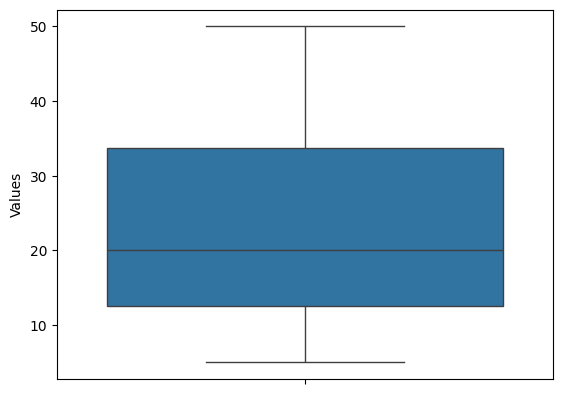

In [113]:
sns.boxplot(df['Values'])

# Data Encoding:
Data encoding is the process of converting categorical (non-numerical) data into numerical format so that machine learning models, which work with numerical inputs, can interpret and analyze the data effectively. Encoding ensures that the relationships in categorical data are appropriately represented for the model.

In [116]:
from sklearn.preprocessing import OneHotEncoder

In [117]:
df=pd.DataFrame({
    'color':['red','green','blue','red',]
})

In [118]:
df.head()

,color
0,red
1,green
2,blue
3,red


In [119]:
## we create a istance of OnehotEncoder
encoder=OneHotEncoder()

In [121]:
# perform fit and transform
encoded = encoder.fit_transform(df[['color']]).toarray()


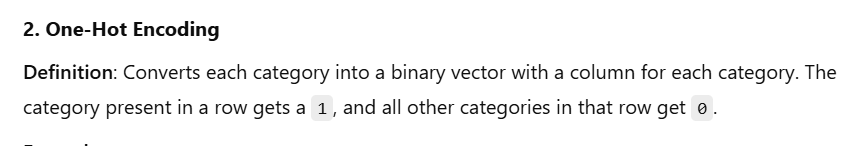

In [125]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Sample DataFrame
data = {'color': ['red', 'blue', 'green', 'blue', 'red','green']}
df = pd.DataFrame(data)

# Initialize OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the 'color' column
encoded = encoder.fit_transform(df[['color']]).toarray()

# Display the encoded array
print("Encoded Array:")
print(encoded)

#  Convert to a DataFrame for better readability
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['color']))
print("\nEncoded DataFrame:")
print(encoded_df)


Encoded Array:
[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]

Encoded DataFrame:
   color_blue  color_green  color_red
0         0.0          0.0        1.0
1         1.0          0.0        0.0
2         0.0          1.0        0.0
3         1.0          0.0        0.0
4         0.0          0.0        1.0
5         0.0          1.0        0.0


In [126]:
encoded_df

,color_blue,color_green,color_red
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
5,0.0,1.0,0.0


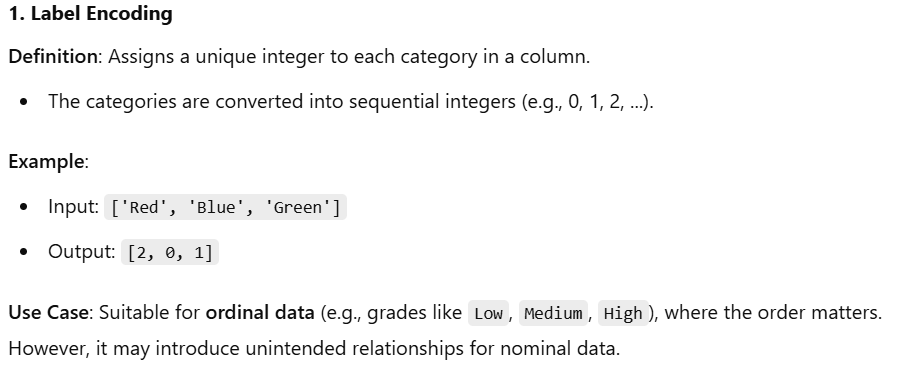

In [127]:
from sklearn.preprocessing import LabelEncoder

# Example data
data = {'Color': ['Red', 'Blue', 'Green', 'Blue', 'Red']}
df = pd.DataFrame(data)

# Apply Label Encoding
label_encoder = LabelEncoder()
df['Color_Encoded'] = label_encoder.fit_transform(df['Color'])

print(df)


   Color  Color_Encoded
0    Red              2
1   Blue              0
2  Green              1
3   Blue              0
4    Red              2


# 3. Ordinal Encoding
Maps categories to integers based on their order.

In [128]:
from sklearn.preprocessing import OrdinalEncoder

# Example data
data = {'Size': ['Small', 'Medium', 'Large', 'Small']}
df = pd.DataFrame(data)

# Apply Ordinal Encoding
ordinal_encoder = OrdinalEncoder(categories=[['Small', 'Medium', 'Large']])
df['Size_Encoded'] = ordinal_encoder.fit_transform(df[['Size']])

print(df)


     Size  Size_Encoded
0   Small           0.0
1  Medium           1.0
2   Large           2.0
3   Small           0.0
